In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import from Datetime 
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Reading the data set

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## reading first 5 rows

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Shape of data

In [4]:
df.shape

(10683, 11)

### Find the unique values

In [5]:
for i in df.columns:
    print(i,"....",df[i].unique())

Airline .... ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey .... ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source .... ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination .... ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route .... ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM

### Checking the basic information of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Checking the null values

In [7]:

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### from checking null values we find there is missing value in Route and Total_stops. now, fill the missing values of Route and Total_stops columns by mode values since both are object.

In [8]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [9]:
df['Route'].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [10]:
df['Total_Stops'].fillna(df["Total_Stops"].mode()[0],inplace=True)


In [11]:
df['Route'].fillna(df["Route"].mode()[0],inplace=True)


### now again checking missing values

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### In Destination column there is ambiguity as Delhi and New delhi are same. so we rectify this ambiguity.so remove delhi from new delhi

In [13]:
df['Destination']=df['Destination'].replace(['Delhi','New Delhi'])
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

### From df.info() we found that Date_of_Journey,Dep_Time,Arrival_Time is a object data type. so we require pandas for converting object data type to datetime dtype

In [14]:
df["Date_of_Journey"]=pd.to_datetime(df['Date_of_Journey'])
df["Dep_Time"]=pd.to_datetime(df['Dep_Time'])
df["Arrival_Time"]=pd.to_datetime(df['Arrival_Time'])



### Now ,use Feature Engineering  for adding the following columns:

In [15]:
# Extracting  day 
df["day_of_journey"] = df["Date_of_Journey"].dt.day

# Extracting month
df["month_of_journey"] = df["Date_of_Journey"].dt.month

## Extracting  departure Hours
df["Dep_hour"] = df["Dep_Time"].dt.hour

# Extracting departure Minutes
df["Dep_min"] = df["Dep_Time"].dt.minute

## Extracting  arrival Hours
df["arrival_hour"] = df["Arrival_Time"].dt.hour

# Extracting arrival Minutes
df["arrival_min"] = df["Arrival_Time"].dt.minute


In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-23 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-23 05:50:00,2023-02-23 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-23 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-02-23 18:05:00,2023-02-23 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Banglore,BLR → NAG → DEL,2023-02-23 16:50:00,2023-02-23 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


### Now, drop the columns Dep_Time,Arrival_Time,Date_of_Journey

In [17]:
df.drop(columns=['Dep_Time','Arrival_Time','Date_of_Journey'],inplace=True)

In [18]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


### EVAL it takes the expressions in the form of string and convert it into expression and after that analyze and give the result

In [19]:
eval('2+9')

11

In [20]:

ls='22+5'
eval(ls)

27

#### converting Duration into minutes

In [21]:
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(" ","+").str.replace('m','*1').apply(eval)

In [22]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15


### do encoding on Total_stops column

In [23]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [24]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,5,50,13,15


In [25]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration             int64
Total_Stops          int64
Additional_Info     object
Price                int64
day_of_journey       int64
month_of_journey     int64
Dep_hour             int64
Dep_min              int64
arrival_hour         int64
arrival_min          int64
dtype: object

## INSIGHTS

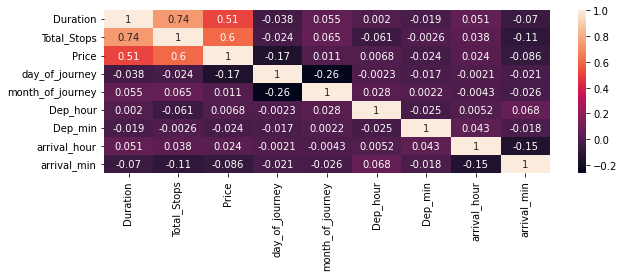

In [26]:
### Correlation
plt.figure(figsize=(10,3))
sns.heatmap(df.corr(),annot=True);

### Checking the statistical summary

In [27]:
df.describe()

,Duration,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.093232,0.824207,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630
std,507.862001,0.675199,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036
min,5.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10683.0,643.093232,507.862001,5.0,170.0,520.0,930.0,2860.0
Total_Stops,10683.0,0.824207,0.675199,0.0,0.0,1.0,1.0,4.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
day_of_journey,10683.0,12.682205,8.803701,3.0,5.0,6.0,21.0,27.0
month_of_journey,10683.0,5.534775,2.987489,1.0,3.0,5.0,6.0,12.0
Dep_hour,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
arrival_hour,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0


In [29]:
df[df['Duration']==5.0]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5,2,No info,17327,3,6,16,50,16,55


In [30]:
x=df[(df['Source']=='Mumbai')& (df['Destination']=="Hyderabad")&(df['Total_Stops']==2)]
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
597,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,1775,2,No info,25139,3,6,9,40,15,15
1417,Air India,Mumbai,Hyderabad,BOM → AMD → ISK → HYD,795,2,No info,9977,3,12,1,35,14,50
1424,Jet Airways,Mumbai,Hyderabad,BOM → DED → DEL → HYD,1590,2,No info,24115,3,6,14,20,16,50
1784,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,1995,2,No info,14219,3,6,6,0,15,15
1824,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,845,2,No info,22619,3,6,9,40,23,45
2857,Air India,Mumbai,Hyderabad,BOM → COK → MAA → HYD,990,2,No info,9678,3,6,5,30,22,0
3294,Jet Airways,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,1665,2,No info,21375,3,6,13,5,16,50
3821,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,255,2,No info,16172,3,12,21,10,16,55
4402,Air India,Mumbai,Hyderabad,BOM → AMD → ISK → HYD,560,2,No info,13757,3,6,5,30,14,50
4659,Air India,Mumbai,Hyderabad,BOM → BHO → DEL → HYD,1795,2,No info,14219,3,6,6,0,11,55


In [31]:
x['Duration'].mode()

0     255
1     560
2     710
3    1795
4    2245
Name: Duration, dtype: int64

In [32]:
x['Duration'].mean()

1101.3333333333333

In [33]:
round(x['Duration'].mean(),2)

1101.33

In [34]:
df['Duration'].iloc[6474]=round(x['Duration'].mean(),2)

In [35]:
df.iloc[6474]

Airline                         Air India
Source                             Mumbai
Destination                     Hyderabad
Route               BOM → GOI → PNQ → HYD
Duration                          1101.33
Total_Stops                             2
Additional_Info                   No info
Price                               17327
day_of_journey                          3
month_of_journey                        6
Dep_hour                               16
Dep_min                                50
arrival_hour                           16
arrival_min                            55
Name: 6474, dtype: object

### Now,analysis the data from price columns

#### Univariate analysis on Price

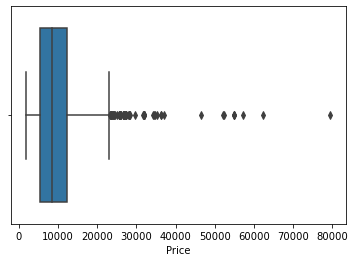

In [36]:
sns.boxplot(df['Price']);

####  from this we frind the insights that Mostly flight having the price in between 5K to 15K and 50% of that data of the flight having the price less then 8k

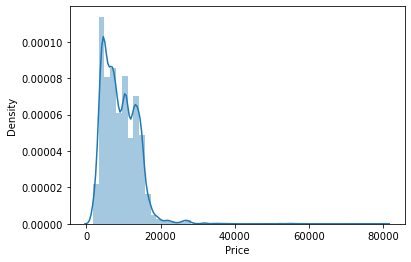

In [37]:
sns.distplot(df['Price']);

#### Find the max.min and average price of flights in the data

In [38]:
df['Price'].agg(['mean','max','min'])

mean     9087.064121
max     79512.000000
min      1759.000000
Name: Price, dtype: float64

### Find the total number of flights of each company

In [39]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

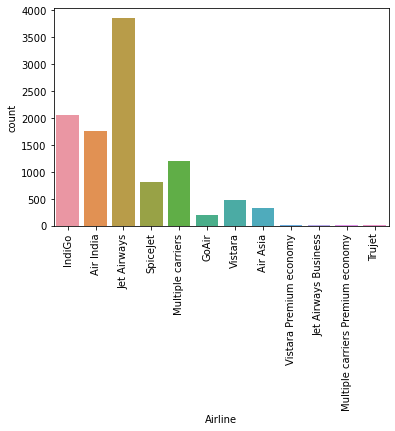

In [40]:
sns.countplot(df['Airline'])
plt.xticks(rotation=90);

### Insights: jet airways has the highest number of flights. Vistara Premium economy and Trujet have less number of flights.               

### How price varies with flights company

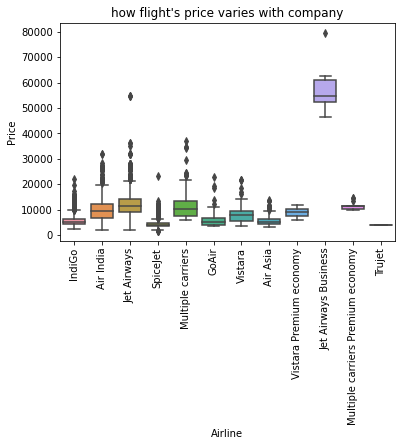

In [41]:
sns.boxplot(x='Airline',y='Price',data=df);
plt.xticks(rotation=90)
plt.title("how flight's price varies with company");

### Insights: The Cheapest flight is: Trujet
### The expensive flight is :Jet Airways Business

### Find the details of expensive flight.

In [42]:
df[df['Airline']=='Jet Airways Business']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
657,Jet Airways Business,Banglore,Banglore,BLR → BOM → DEL,300.0,1,No info,52229,3,1,5,45,10,45
2924,Jet Airways Business,Banglore,Cochin,BLR → BOM → DEL,340.0,1,Business class,79512,3,1,5,45,11,25
5372,Jet Airways Business,Banglore,Cochin,BLR → BOM → DEL,400.0,1,Business class,62427,3,1,5,45,12,25
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500.0,2,No info,46490,3,3,20,5,4,25
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500.0,2,No info,52285,3,6,20,5,4,25
10364,Jet Airways Business,Banglore,Cochin,BLR → MAA → DEL,280.0,1,Business class,57209,3,1,9,45,14,25


### Find the details of the cheapest flight

In [43]:
df[df['Airline']=='Trujet']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
2878,Trujet,Mumbai,Hyderabad,BOM → NDC → HYD,195.0,1,No info,4140,3,6,13,5,16,20


### How many flights with respect to their stoppage?

In [44]:
df['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

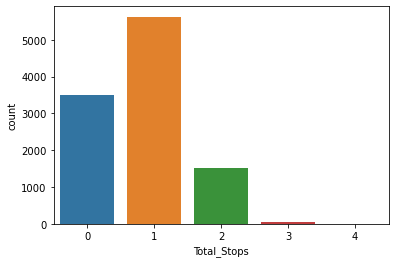

In [45]:
sns.countplot(x='Total_Stops',data=df)

### Find the flights which have four stoppage?

In [46]:
df[df['Total_Stops']==4]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
9182,Air India,Banglore,Cochin,BLR → CCU → BBI → HYD → VGA → DEL,1770.0,4,Change airports,17686,3,1,5,50,11,20


### Find the flights with repect to the number of stoppage?

In [47]:
df.groupby(['Total_Stops'])["Airline"].value_counts()

Total_Stops  Airline                          
0            IndiGo                               1241
             SpiceJet                              670
             Jet Airways                           623
             Air India                             417
             Vistara                               264
             Air Asia                              181
             GoAir                                  92
             Vistara Premium economy                 3
1            Jet Airways                          2535
             Multiple carriers                    1145
             IndiGo                                793
             Air India                             541
             Vistara                               215
             SpiceJet                              148
             Air Asia                              129
             GoAir                                 102
             Multiple carriers Premium economy      13
             Jet A

### Insigts:
#### Jet Airways highest number of flights with 1 stoppage.
#### Trjuet have lowest number of flights with 1 stoppage.
#### Air India have highest number of flights with 2 stoppage.
#### Air India have highest number of flights with 3 stoppage.
#### Air India is the only flights with 4 stoppage.

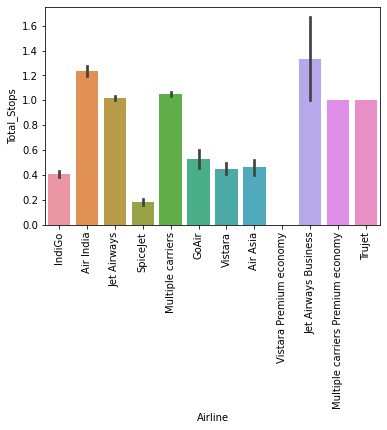

In [48]:
sns.barplot(x='Airline',y='Total_Stops',data=df)
plt.xticks(rotation=90);

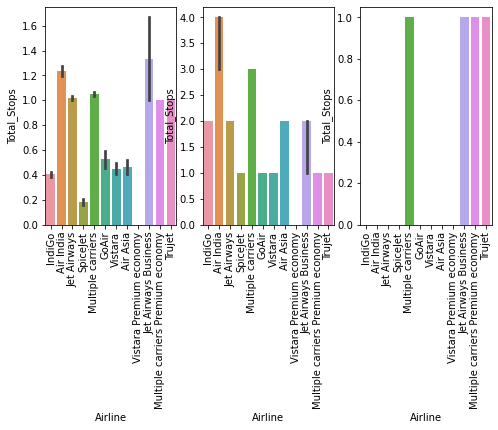

In [49]:
plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
sns.barplot(x='Airline',y='Total_Stops',data=df)
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(x='Airline',y='Total_Stops',data=df,estimator=max)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.barplot(x='Airline',y='Total_Stops',data=df,estimator=min)
plt.xticks(rotation=90);

### Find the deatils of the Vistara Premium economy flight

In [50]:
df[df['Airline']=='Vistara Premium economy']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
426,Vistara Premium economy,Banglore,Cochin,BLR → DEL,155.0,0,No info,11793,3,3,16,0,18,35
7657,Vistara Premium economy,Chennai,Kolkata,MAA → CCU,135.0,0,No info,9125,3,1,7,5,9,20
8615,Vistara Premium economy,Banglore,Banglore,BLR → DEL,170.0,0,No info,5969,4,6,11,30,14,20


### How no of stoppage varies with price

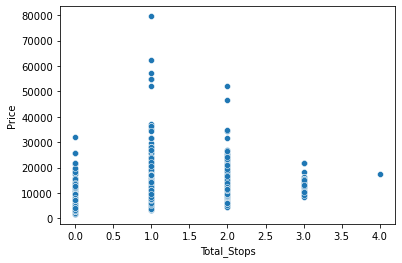

In [51]:
sns.scatterplot(x='Total_Stops',y='Price',data=df);

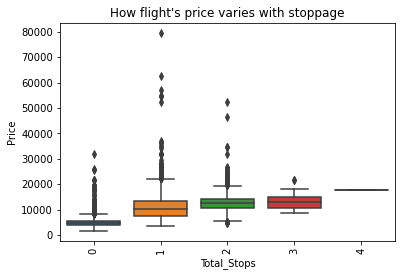

In [52]:
sns.boxplot(x='Total_Stops',y='Price',data=df);
plt.xticks(rotation=90)
plt.title("How flight's price varies with stoppage");

### Insights:
#### The expensive flights have 1 stoppage

### which flight is available from source to destination

In [53]:
df.groupby(['Source','Destination'])['Airline'].value_counts()

Source    Destination  Airline    
Banglore  Banglore     Jet Airways    276
                       IndiGo         179
                       Air India       95
                       SpiceJet        68
                       Vistara         63
                                     ... 
Mumbai    Hyderabad    IndiGo         196
                       Air India      136
                       SpiceJet       122
                       Vistara         23
                       Trujet           1
Name: Airline, Length: 61, dtype: int64

### find the max,min and average price of different price from source to destination

In [54]:
k=df.groupby(['Source','Destination','Airline'])['Price'].agg(['mean','max','min'])
k.reset_index(inplace=True)
k

,Source,Destination,Airline,mean,max,min
0,Banglore,Banglore,Air Asia,4699.238095,8420,3383
1,Banglore,Banglore,Air India,9219.189474,26092,4441
2,Banglore,Banglore,GoAir,4590.612903,8352,3398
3,Banglore,Banglore,IndiGo,5472.106145,19685,3419
4,Banglore,Banglore,Jet Airways,11112.536232,31825,3502
...,...,...,...,...,...,...
56,Mumbai,Hyderabad,IndiGo,3659.816327,17501,2227
57,Mumbai,Hyderabad,Jet Airways,6227.949772,24210,1840
58,Mumbai,Hyderabad,SpiceJet,2511.106557,13552,1759
59,Mumbai,Hyderabad,Trujet,4140.000000,4140,4140


In [55]:

k1=k[(k["Source"]=="Banglore")&(k["Destination"]=="New Delhi")]
k1

,Source,Destination,Airline,mean,max,min
32,Banglore,New Delhi,IndiGo,3897.0,3897,3897


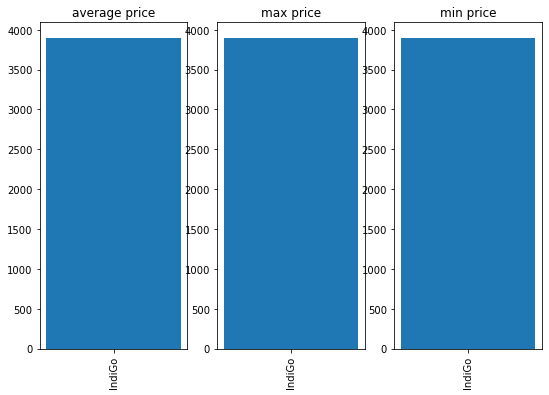

In [56]:
plt.figure(figsize=(9,6))
plt.subplot(1,3,1)
plt.bar(k1['Airline'],k1['mean'])
plt.title('average price')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
plt.bar(k1['Airline'],k1['max'])
plt.title('max price')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
plt.bar(k1['Airline'],k1['min'])
plt.title('min price')
plt.xticks(rotation=90);

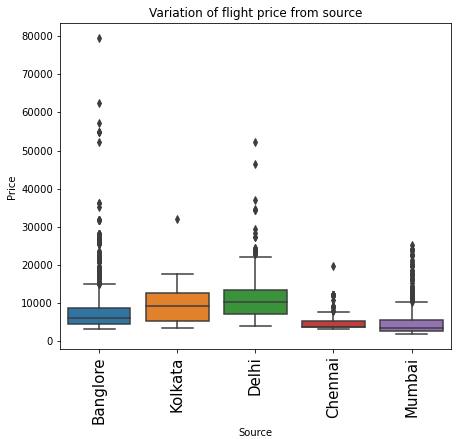

In [57]:
# Variation of flight price from source
plt.figure(figsize=(7,6))
sns.boxplot(df['Source'],df['Price'],data=df)
plt.xticks(rotation=90,size=15)
plt.title('Variation of flight price from source');

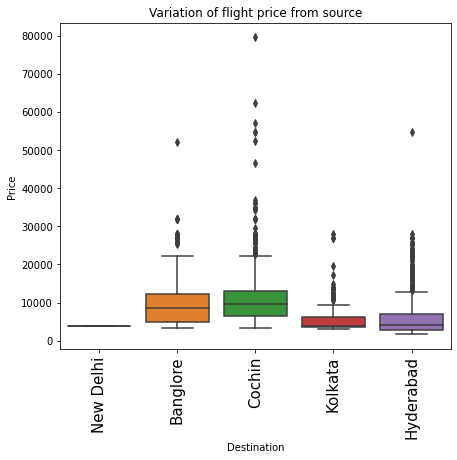

In [58]:
plt.figure(figsize=(7,6))
sns.boxplot(df['Destination'],df['Price'],data=df)
plt.xticks(rotation=90,size=15)
plt.title('Variation of flight price from source');

<AxesSubplot:xlabel='month_of_journey', ylabel='count'>

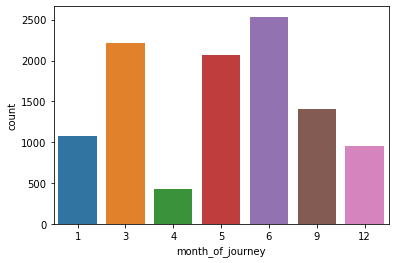

In [59]:
# on which month have max flight take off?
sns.countplot(x='month_of_journey',data=df)

<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

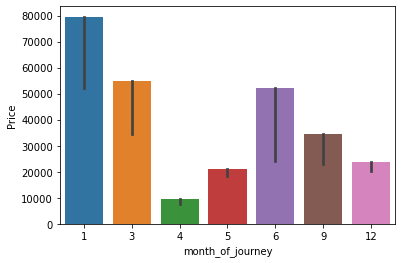

In [60]:
sns.barplot(x='month_of_journey',y='Price',data=df,estimator=max)

<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

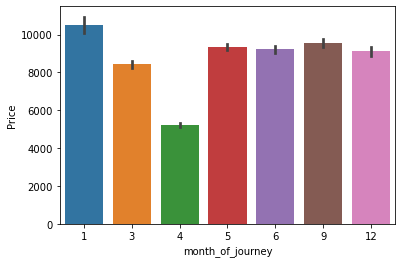

In [61]:
sns.barplot(x='month_of_journey',y='Price',data=df)

Text(0.5, 1.0, '')

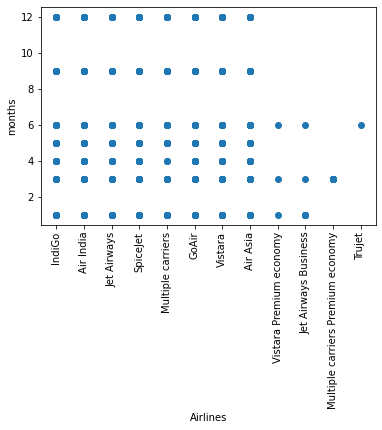

In [62]:
# which flight take off in which month
plt.scatter(df['Airline'],df['month_of_journey'])
plt.xticks(rotation=90)
plt.ylabel('months')
plt.xlabel('Airlines')
plt.title('')
           



# how many flights take off in each month

In [43]:
df.groupby(['month_of_journey'])['Airline'].value_counts()

month_of_journey  Airline          
1                 Jet Airways          430
                  Air India            197
                  IndiGo               184
                  SpiceJet              76
                  Multiple carriers     75
                                      ... 
12                Multiple carriers     65
                  SpiceJet              54
                  Vistara               52
                  Air Asia              29
                  GoAir                 12
Name: Airline, Length: 64, dtype: int64

# how month of journey varies with price

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

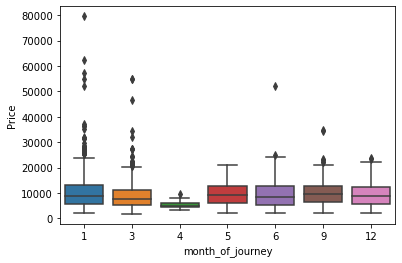

In [44]:
sns.boxplot(df['month_of_journey'],df['Price'])

# which was the peak day for day of journey

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


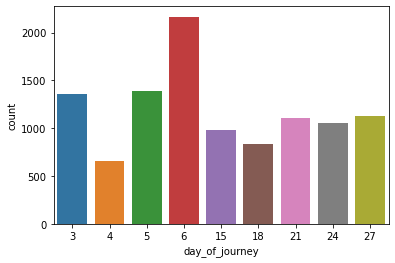

In [47]:
sns.countplot(df['day_of_journey']);

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


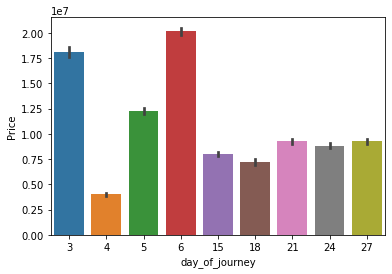

In [48]:
sns.barplot(df['day_of_journey'],df['Price'],estimator=sum);

# what was the peak departure time.

In [49]:
df['Dep_hour'].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_hour, dtype: int64

# find the peak departure time for differ flights

In [50]:
df.groupby(['Airline'])['Dep_hour'].value_counts()

Airline                  Dep_hour
Air Asia                 7           53
                         22          39
                         19          37
                         16          33
                         23          33
                                     ..
Vistara                  10           1
                         12           1
Vistara Premium economy  7            1
                         11           1
                         16           1
Name: Dep_hour, Length: 149, dtype: int64

In [51]:
df.groupby(['Source','Airline'])['Dep_hour'].value_counts()

Source    Airline    Dep_hour
Banglore  Air Asia   23          33
                     11          24
                     4           23
                     5            9
          Air India  6           53
                                 ..
Mumbai    Vistara    11           2
                     20           2
                     10           1
                     14           1
                     19           1
Name: Dep_hour, Length: 308, dtype: int64

# find the peak arrival hour

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arrival_hour', ylabel='count'>

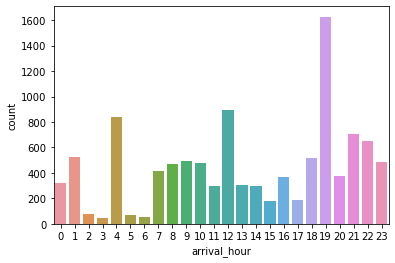

In [52]:
sns.countplot(df['arrival_hour'])